In [81]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [82]:
# Power Parameters
h=6.6260700e-34                 #Planck's Constant
kb=1.38064852e-23               #Boltzmann's Constant
c=2.998e8;                          #Light Velocity in vacuum
Tsum=300;                      #CMB Temperature
Twin=273;                      #CMB Temperature
Tcmb=2.73;                      #CMB
freq=np.arange(40e9,200e9,1e9); #Frequency vector
tausum=0.25;
tauwin=0.04;
esum=1-np.exp(-tausum);         #Emissivity 0.22
ewin=1-np.exp(-tauwin);         #Emissivity 0.04
trsum=np.exp(-tausum);
trwin=np.exp(-tauwin);
bwrel=0.25;                     #relative bandwidth
eta=0.55;

In [83]:
# Calculations
wav=c/freq;                     #Wavelenght vector
sang=(wav)**2;                  #Solid angle of antenna
Bsum=((2*h*freq**3)/(c**2))*(1/(np.exp((h*freq)/(kb*Tsum))-1));
Bwin=((2*h*freq**3)/(c**2))*(1/(np.exp((h*freq)/(kb*Twin))-1)); #Spectral Radiance
B=((2*h*freq**3)/(c**2))*(1/(np.exp((h*freq)/(kb*Tcmb))-1)); #Spectral Radiance
Psum=eta*esum*Bsum*sang*bwrel*freq;                                    #Power sum
Pwin=eta*ewin*Bwin*sang*bwrel*freq;                                    #Power win
Pcmbsum=eta*trsum*B*sang*bwrel*freq;                                    #Power sum
Pcmbwin=eta*trwin*B*sang*bwrel*freq;                                    #Power win
Pts=Psum+Pcmbsum;
Ptw=Pwin+Pcmbwin;

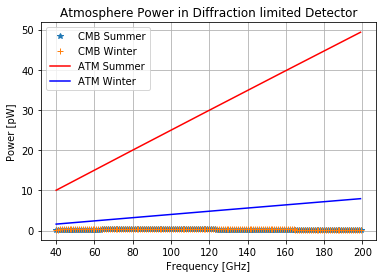

In [84]:
#Ploting CMB power

fig, ax = plt.subplots()
ax.plot(freq/1e9,Pcmbsum/1e-12,'*',freq/1e9,Pcmbwin/1e-12,'+',freq/1e9,Psum/1e-12,'r',freq/1e9,Pwin/1e-12,'b')

ax.set(xlabel='Frequency [GHz]', ylabel='Power [pW]',
       title='Atmosphere Power in Diffraction limited Detector')
ax.grid()
ax.legend(['CMB Summer','CMB Winter','ATM Summer','ATM Winter'])

fig.savefig("Atmosphere-POWER.pdf")
plt.show()

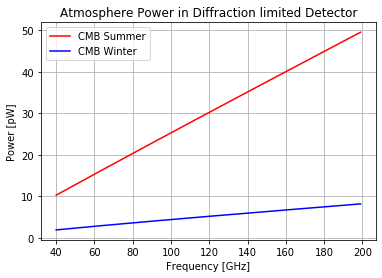

In [85]:
#Ploting TOTAL power

fig, ax = plt.subplots()
ax.plot(freq/1e9,Pts/1e-12,'r',freq/1e9,Ptw/1e-12,'b')

ax.set(xlabel='Frequency [GHz]', ylabel='Power [pW]',
       title='Atmosphere Power in Diffraction limited Detector')
ax.grid()
ax.legend(['CMB Summer','CMB Winter'])

fig.savefig("Atmosphere-POWER.pdf")
plt.show()

In [86]:
# NEP Parameters
m=1;               #m=1 polarized detector,m=2 otherwise.
bw=bwrel*freq;     #Bandwidth.

In [87]:
# NEP Calculation
NEPsum=np.sqrt(2*h*freq*Psum+(2*Psum**2)/(m*bw));        #Noise Equivalent Power with bunching term
NEPwin=np.sqrt(2*h*freq*Pwin+(2*Pwin**2)/(m*bw));        #Noise Equivalent Power with bunching term
NEPcs=np.sqrt(2*h*freq*Pcmbsum+(2*Pcmbsum**2)/(m*bw));        #Noise Equivalent Power with bunching term
NEPcw=np.sqrt(2*h*freq*Pcmbwin+(2*Pcmbwin**2)/(m*bw));        #Noise Equivalent Power with bunching term

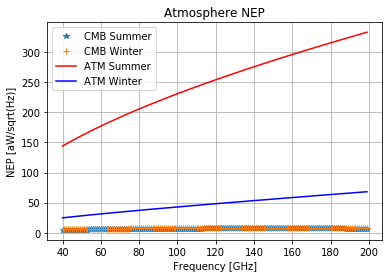

In [88]:
#Ploting NEP
fig, ax = plt.subplots()
ax.plot(freq/1e9,NEPcs/1e-18,'*',freq/1e9,NEPcw/1e-18,'+',freq/1e9,NEPsum/1e-18,'r',freq/1e9,NEPwin/1e-18,'b')


ax.set(xlabel='Frequency [GHz]', ylabel='NEP [aW/sqrt(Hz)]',
       title='Atmosphere NEP')
ax.grid()
ax.legend(['CMB Summer','CMB Winter','ATM Summer','ATM Winter'])

fig.savefig("Atmosphere-NEP.pdf")
plt.show()

In [80]:
# Total NEP Calculation
NEPts=np.sqrt(NEPsum**2+NEPcs**2)       #Noise Equivalent Power with bunching term
NEPtw=np.sqrt(NEPwin**2+NEPcw**2)       #Noise Equivalent Power with bunching term

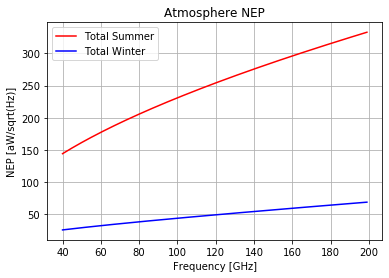

In [64]:
#Ploting NEP
fig, ax = plt.subplots()
ax.plot(freq/1e9,NEPts/1e-18,'r',freq/1e9,NEPtw/1e-18,'b')


ax.set(xlabel='Frequency [GHz]', ylabel='NEP [aW/sqrt(Hz)]',
       title='Atmosphere NEP')
ax.grid()
ax.legend(['Total Summer','Total Winter'])

fig.savefig("Total NEP.pdf")
plt.show()